In [23]:
import math
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt
import numpy as np

# Activation Functions in Machine Learning
Activation functions are a crucial part of neural networks. They determine whether a neuron should be activated or not based on the input it receives. In this notebook, we will cover various activation functions, implement them in both Vanilla Python and PyTorch, and discuss their properties, advantages, and disadvantages.

## Why Activation Functions Are Needed
Without activation functions, neural networks would simply be linear models. Activation functions introduce non-linearity, allowing neural networks to learn complex patterns in data.

In [2]:
X, y = make_moons(n_samples=1000, noise=0.2, random_state=42)
scaler = StandardScaler()
X = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

X_train = torch.tensor(X_train, dtype=torch.float32)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32).unsqueeze(1)
y_test = torch.tensor(y_test, dtype=torch.float32).unsqueeze(1)

In [4]:
X_train.shape, y_train.shape

(torch.Size([700, 2]), torch.Size([700, 1]))

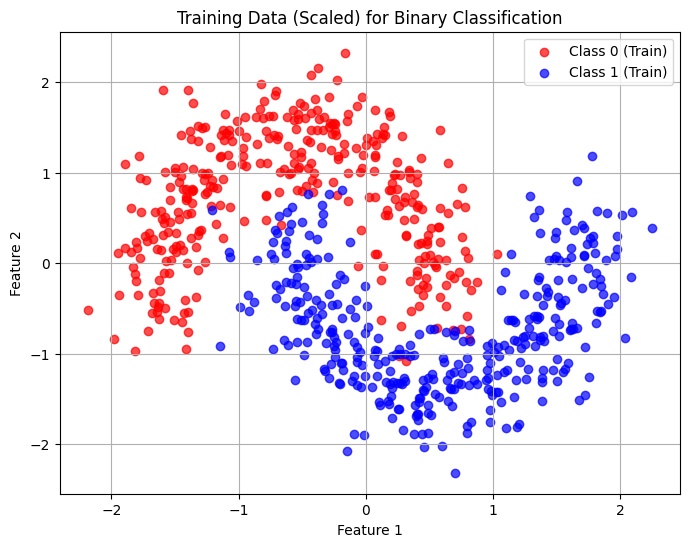

In [31]:
y_train = y_train.flatten()

class_0_train = X_train[y_train == 0]
class_1_train = X_train[y_train == 1]

plt.figure(figsize=(8, 6))
plt.scatter(class_0_train[:, 0], class_0_train[:, 1], color='red', label='Class 0 (Train)', alpha=0.7)
plt.scatter(class_1_train[:, 0], class_1_train[:, 1], color='blue', label='Class 1 (Train)', alpha=0.7)
plt.title('Training Data (Scaled) for Binary Classification')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid(True)
plt.show()

In [5]:
class ModelWithoutActivation(nn.Module):
    def __init__(self):
        super(ModelWithoutActivation, self).__init__()
        self.fc1 = nn.Linear(2, 10)
        self.fc2 = nn.Linear(10, 10)
        self.fc3 = nn.Linear(10, 1)

    def forward(self, x):
        x = self.fc1(x)
        x = self.fc2(x)
        x = torch.sigmoid(self.fc3(x))
        return x

In [6]:
class ModelWithActivation(nn.Module):
    def __init__(self):
        super(ModelWithActivation, self).__init__()
        self.fc1 = nn.Linear(2, 10)
        self.fc2 = nn.Linear(10, 10)
        self.fc3 = nn.Linear(10, 1)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = torch.sigmoid(self.fc3(x))
        return x

In [7]:
def train_model(model, X_train, y_train, X_test, y_test, lr=0.01, epochs=200):
    criterion = nn.BCELoss()
    optimizer = optim.Adam(model.parameters(), lr=lr)
    losses = []
    for epoch in range(epochs):
        model.train()
        optimizer.zero_grad()
        outputs = model(X_train)
        loss = criterion(outputs, y_train)
        loss.backward()
        optimizer.step()
        losses.append(loss.item())

    model.eval()
    with torch.no_grad():
        test_outputs = model(X_test)
        test_loss = criterion(test_outputs, y_test)
        test_accuracy = ((test_outputs.round() == y_test).float().mean()).item()
    
    return losses, test_loss.item(), test_accuracy

In [8]:
model_with_activation = ModelWithActivation()
model_without_activation = ModelWithoutActivation()

In [9]:
losses_with_activation, test_loss_with, test_accuracy_with = train_model(model_with_activation, X_train, y_train, X_test, y_test)
losses_without_activation, test_loss_without, test_accuracy_without = train_model(model_without_activation, X_train, y_train, X_test, y_test)

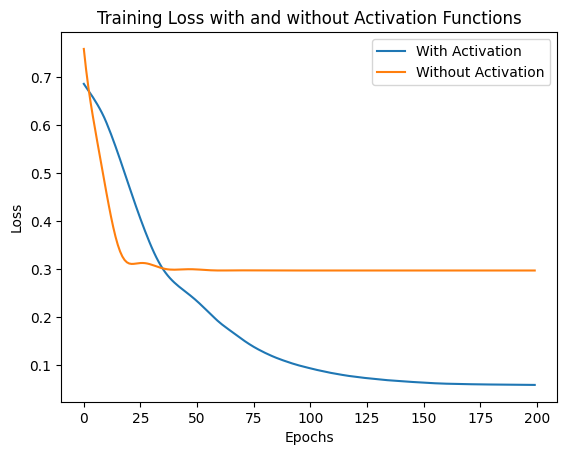

Test Loss (Without Activation): 0.2605, Test Accuracy (Without Activation): 0.8767
Test Loss (With Activation): 0.0647, Test Accuracy (With Activation): 0.9733


In [22]:
plt.plot(losses_with_activation, label="With Activation")
plt.plot(losses_without_activation, label="Without Activation")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.title("Training Loss with and without Activation Functions")
plt.show()

# Print results
print(f"Test Loss (Without Activation): {test_loss_without:.4f}, Test Accuracy (Without Activation): {test_accuracy_without:.4f}")
print(f"Test Loss (With Activation): {test_loss_with:.4f}, Test Accuracy (With Activation): {test_accuracy_with:.4f}")

## Convenience Methods

In [55]:
def return_data():
    X = torch.tensor([[0.0, 0.0], [0.0, 1.0], [1.0, 0.0], [1.0, 1.0]])
    y = torch.tensor([[0], [1], [1], [0]])
    
    return X, y

# Types of Activation Functions

## Sigmoid
The Sigmoid function maps the input to a value between 0 and 1, which can be useful for probability-based models.
**Formula:**
$$ f(x) = \frac{1}{1 + e^{-x}} $$

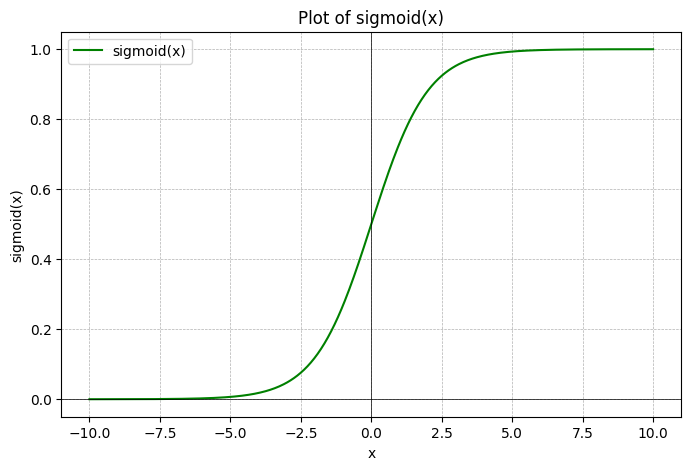

In [81]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

x = np.linspace(-10, 10, 500)
y = sigmoid(x)

plt.figure(figsize=(8, 5))
plt.plot(x, y, label='sigmoid(x)', color='green')
plt.title('Plot of sigmoid(x)')
plt.xlabel('x')
plt.ylabel('sigmoid(x)')
plt.axhline(0, color='black', linewidth=0.5) 
plt.axvline(0, color='black', linewidth=0.5) 
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.legend()
plt.show()

In [65]:
X, y = return_data()

In [66]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

sigmoid(np.array([-1, 0, 1]))

array([0.26894142, 0.5       , 0.73105858])

In [67]:
sigmoid_torch = torch.nn.Sigmoid()
x = torch.tensor([-1.0, 0.0, 1.0])
sigmoid_torch(x)

tensor([0.2689, 0.5000, 0.7311])

In [68]:
class BinaryClassificationModel(nn.Module):
    def __init__(self):
        super(BinaryClassificationModel, self).__init__()
        self.hidden = nn.Linear(2, 4)
        self.output = nn.Linear(4, 1)

    def forward(self, x):
        x = torch.relu(self.hidden(x))  # Hidden layer with ReLU activation
        self.output(x).shape
        x = torch.sigmoid(self.output(x))  # Output layer with sigmoid activation
        return x

In [69]:
model = BinaryClassificationModel()
criterion = nn.BCELoss()  # Binary Cross-Entropy Loss for binary classification
optimizer = optim.SGD(model.parameters(), lr=0.1)

In [70]:
for epoch in range(1000):
    model.train()

    outputs = model(X)
    loss = criterion(outputs, y.float())

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (epoch + 1) % 100 == 0:
        print(f'Epoch [{epoch + 1}/1000], Loss: {loss.item():.4f}')

Epoch [100/1000], Loss: 0.6938
Epoch [200/1000], Loss: 0.6933
Epoch [300/1000], Loss: 0.6903
Epoch [400/1000], Loss: 0.6688
Epoch [500/1000], Loss: 0.5770
Epoch [600/1000], Loss: 0.4529
Epoch [700/1000], Loss: 0.3260
Epoch [800/1000], Loss: 0.2100
Epoch [900/1000], Loss: 0.1299
Epoch [1000/1000], Loss: 0.0843


In [71]:
# Test the model
model.eval()
with torch.no_grad():
    test_outputs = model(X)
    print("Predictions:")
    print(test_outputs)

Predictions:
tensor([[0.0795],
        [0.9539],
        [0.8729],
        [0.0683]])


### Derivative

In [85]:
sigmoid_derivative(0.01)

0.2499937501041652

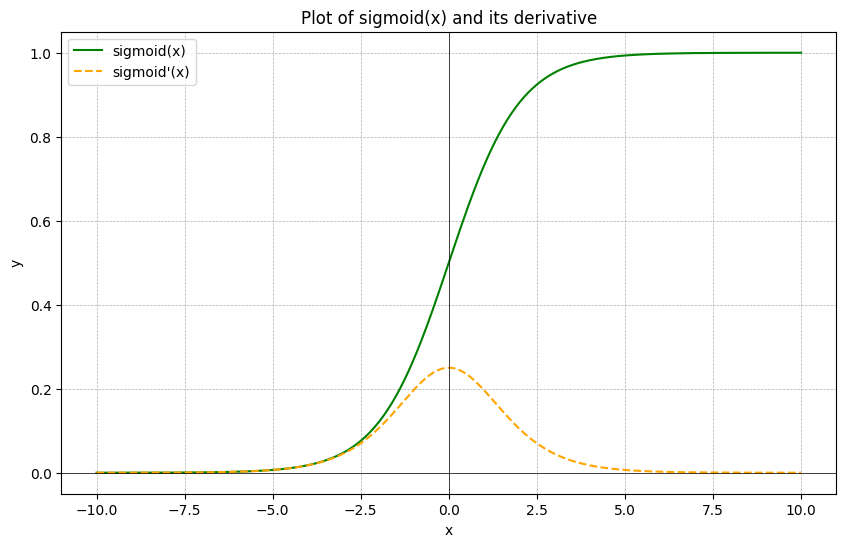

In [83]:
def sigmoid_derivative(x):
    sig = sigmoid(x)
    return sig * (1 - sig)

x = np.linspace(-10, 10, 500)

y_sigmoid = sigmoid(x)
y_sigmoid_derivative = sigmoid_derivative(x)

plt.figure(figsize=(10, 6))
plt.plot(x, y_sigmoid, label='sigmoid(x)', color='green')
plt.plot(x, y_sigmoid_derivative, label="sigmoid'(x)", color='orange', linestyle='--')
plt.title('Plot of sigmoid(x) and its derivative')
plt.xlabel('x')
plt.ylabel('y')
plt.axhline(0, color='black', linewidth=0.5)  
plt.axvline(0, color='black', linewidth=0.5) 
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.legend()
plt.show()

### Advantages:
- Useful for probability-based predictions.
- Smooth gradient.
### Disadvantages:
- Vanishing gradient problem.
- Outputs are not zero-centered.

## Tanh (Hyperbolic Tangent)
The Tanh function maps the input to a value between -1 and 1, offering zero-centered outputs.
**Formula:**
$$ f(x) = \tanh(x) = \frac{e^x - e^{-x}}{e^x + e^{-x}} $$

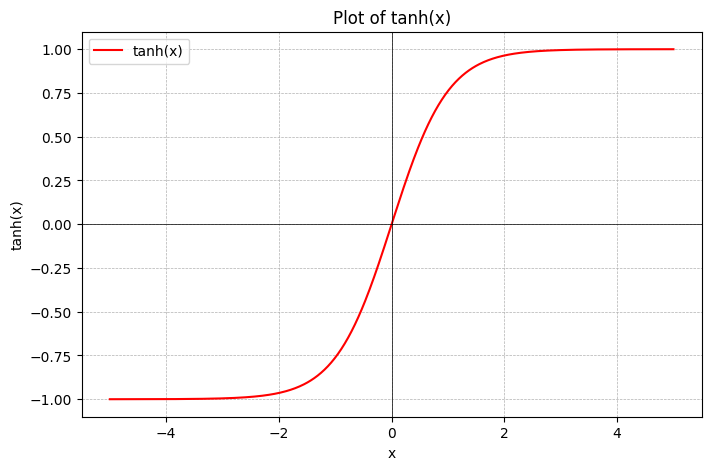

In [80]:
x = np.linspace(-5, 5, 500)
y = np.tanh(x)

plt.figure(figsize=(8, 5))
plt.plot(x, y, label='tanh(x)', color='red')
plt.title('Plot of tanh(x)')
plt.xlabel('x')
plt.ylabel('tanh(x)')
plt.axhline(0, color='black', linewidth=0.5) 
plt.axvline(0, color='black', linewidth=0.5)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.legend()
plt.show()

In [72]:
def tanh(x):
    return np.tanh(x)

tanh(np.array([-1, 0, 1]))

array([-0.76159416,  0.        ,  0.76159416])

In [73]:
tanh_torch = torch.nn.Tanh()
tanh_torch(x)

tensor([-0.7616,  0.0000,  0.7616])

### Derivative

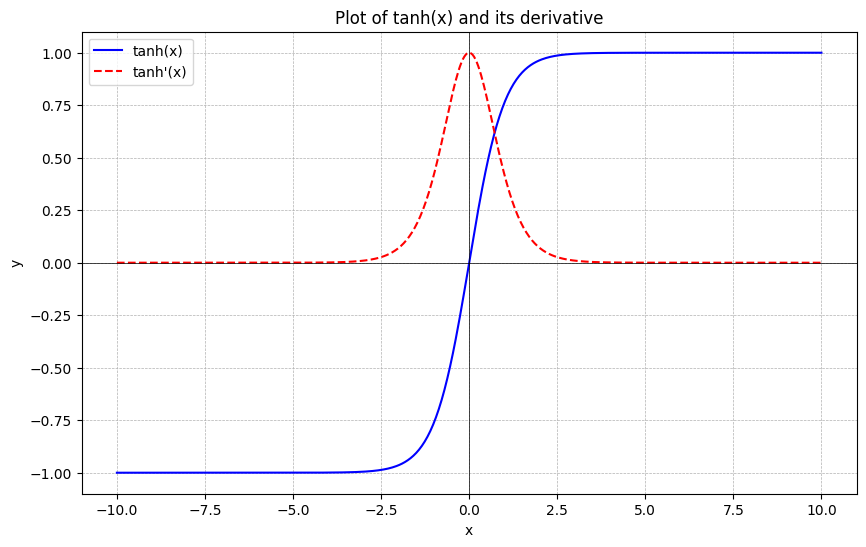

In [82]:
def tanh_derivative(x):
    return 1 - np.tanh(x)**2

y_tanh = tanh(x)
y_tanh_derivative = tanh_derivative(x)

plt.figure(figsize=(10, 6))
plt.plot(x, y_tanh, label='tanh(x)', color='blue')
plt.plot(x, y_tanh_derivative, label="tanh'(x)", color='red', linestyle='--')
plt.title('Plot of tanh(x) and its derivative')
plt.xlabel('x')
plt.ylabel('y')
plt.axhline(0, color='black', linewidth=0.5)  
plt.axvline(0, color='black', linewidth=0.5) 
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.legend()
plt.show()


### Advantages:
- Zero-centered outputs.
- Better than Sigmoid for hidden layers.
### Disadvantages:
- Still suffers from vanishing gradients.
- Computational Cost. The computation of tanh involves exponential calculations, making it more computationally expensive than simpler functions like ReLU.

## ReLU (Rectified Linear Unit)
ReLU is the most widely used activation function. It offers sparse activation and computational efficiency.
**Formula:**
$$ f(x) = \max(0, x) $$

In [ ]:
def relu(x):
    return np.maximum(0, x)

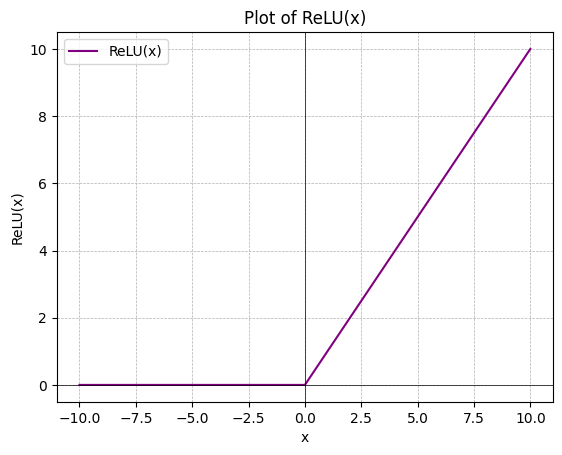

In [87]:
x = [i * 0.1 for i in range(-100, 101)]
y_relu = relu(x)

plt.plot(x, y_relu, label='ReLU(x)', color='purple')
plt.title('Plot of ReLU(x)')
plt.xlabel('x')
plt.ylabel('ReLU(x)')
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.legend()
plt.show()


In [91]:
relu(np.array([-1, 0, 1]))

[0, 0, 1]

In [5]:
torch.manual_seed(42)
t = torch.randn(5)
t

tensor([ 0.3367,  0.1288,  0.2345,  0.2303, -1.1229])

In [6]:
relu_torch = torch.nn.ReLU()
relu_torch(t)

tensor([0.3367, 0.1288, 0.2345, 0.2303, 0.0000])

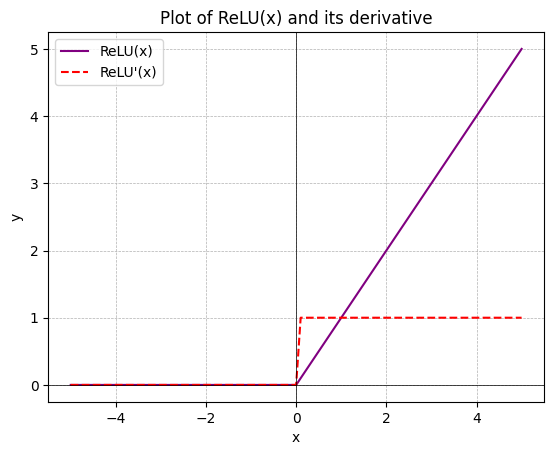

In [8]:
def relu_derivative(x):
    return [1 if i > 0 else 0 for i in x]

x = [i * 0.1 for i in range(-50, 51)]
y_relu = relu(x)
y_relu_derivative = relu_derivative(x)

plt.plot(x, y_relu, label='ReLU(x)', color='purple')
plt.plot(x, y_relu_derivative, label="ReLU'(x)", color='red', linestyle='--')
plt.title('Plot of ReLU(x) and its derivative')
plt.xlabel('x')
plt.ylabel('y')
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.legend()
plt.show()


### Advantages:
- Computationally efficient.
- Does not saturate for positive values.
### Disadvantages:
- Dying ReLU problem (neurons stuck with zero gradients for negative inputs).

## Leaky ReLU
Leaky ReLU addresses the dying ReLU problem by allowing a small negative slope for negative inputs.

**Formula:**
$$ f(x) = \max(0.01x, x) $$

In [9]:
def leaky_relu(x, alpha=0.01):
    return np.where(x > 0, x, alpha * x)

leaky_relu(np.array([-1, 0, 1]))

array([-0.01,  0.  ,  1.  ])

In [13]:
torch.manual_seed(42)
t = torch.randn(5)
t

tensor([ 0.3367,  0.1288,  0.2345,  0.2303, -1.1229])

In [12]:
leaky_relu_torch = torch.nn.LeakyReLU()
leaky_relu_torch(t)

tensor([ 0.3367,  0.1288,  0.2345,  0.2303, -0.0112])

### Advantages:
- Avoids dying ReLU problem.
- Simple modification of ReLU.
### Disadvantages:
- Introduces a small constant slope.

## Softmax
Softmax is commonly used for multi-class classification problems, providing probability distributions for classes.

**Formula:**
$$ f(x_i) = \frac{e^{x_i}}{\sum_{j} e^{x_j}} $$

In [24]:
def softmax(x):
    exp_values = [math.exp(i) for i in x]
    sum_exp = sum(exp_values)
    return [i / sum_exp for i in exp_values]

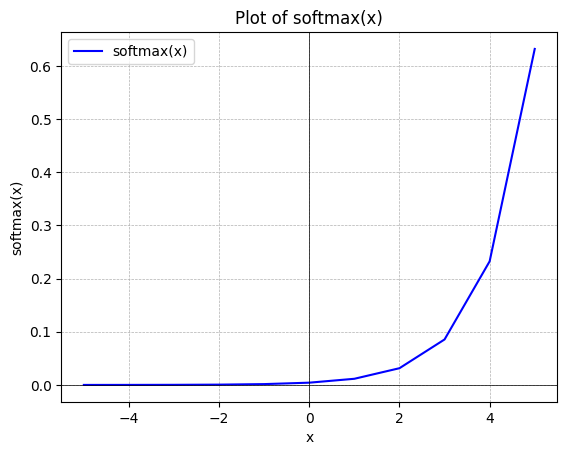

In [25]:
x = [i for i in range(-5, 6)]
y_softmax = softmax(x)

plt.plot(x, y_softmax, label='softmax(x)', color='blue')
plt.title('Plot of softmax(x)')
plt.xlabel('x')
plt.ylabel('softmax(x)')
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.legend()
plt.show()

In [16]:
softmax(np.array([1, 2, 3]))

array([0.09003057, 0.24472847, 0.66524096])

In [17]:
softmax_torch = torch.nn.Softmax(dim=0)
softmax_torch(torch.tensor([1.0, 2.0, 3.0]))

tensor([0.0900, 0.2447, 0.6652])

In [18]:
softmax_results = softmax_torch(torch.tensor([1.0, 2.0, 3.0]))
sum(softmax_results)

tensor(1.)

### Advantages:
- Converts logits to probabilities.
- Used in the output layer for classification.
### Disadvantages:
- Can be computationally expensive for large output spaces.

### 6. Swish
Swish is a newer activation function introduced by Google, defined as $x * sigmoid(x)$.
**Formula:**
$$ f(x) = x * sigmoid(x) $$

In [ ]:
def swish(x):
    return x * sigmoid(x)

swish(np.array([-1, 0, 1]))

In [ ]:
swish_torch = torch.nn.SiLU()
swish_torch(x)

### Advantages:
- Provides smooth, non-monotonic behavior.
- Outperforms ReLU in some cases.
### Disadvantages:
- Computationally more expensive than ReLU.

## Plotting Activation Functions
Let's visualize how these activation functions behave.

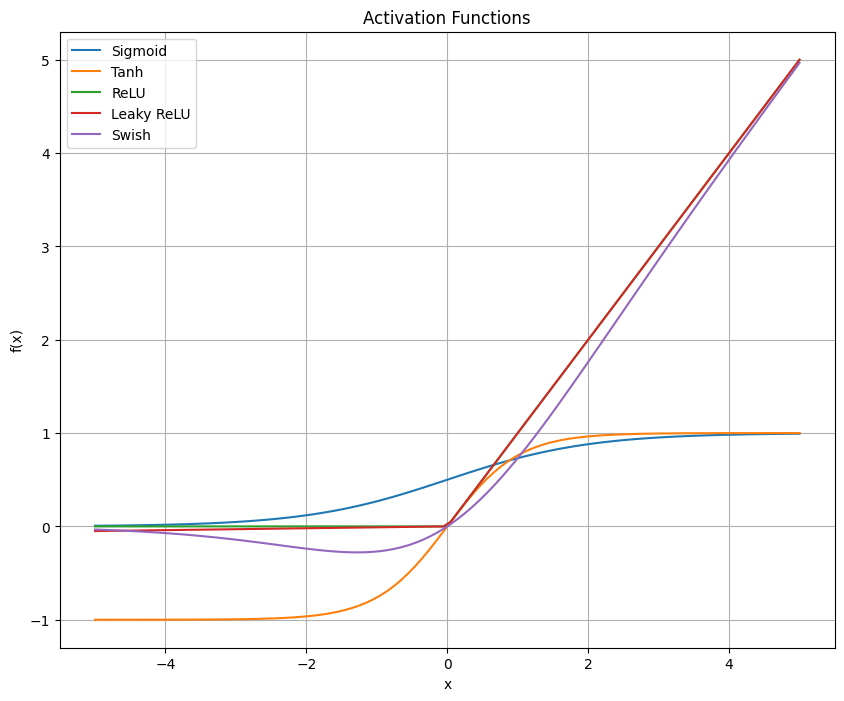

In [35]:
activation_functions = {
    'Sigmoid': lambda x: 1 / (1 + np.exp(-x)),
    'Tanh': np.tanh,
    'ReLU': lambda x: np.maximum(0, x),
    'Leaky ReLU': lambda x: np.where(x > 0, x, 0.01 * x),
    'Swish': lambda x: x / (1 + np.exp(-x)),
}

x = np.linspace(-5, 5, 100)

plt.figure(figsize=(10, 8))
for name, func in activation_functions.items():
    plt.plot(x, func(x), label=name)
plt.title('Activation Functions')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.grid(True)
plt.show()